<a href="https://colab.research.google.com/github/mark3000-010701/Dataanalyst/blob/main/B%C3%A0i_t%E1%BA%ADp_ki%E1%BB%83m_%C4%91%E1%BB%8Bnh_gi%E1%BA%A3_thuy%E1%BA%BFt_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Bài tập] Kiểm định GDP List**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy

In [ ]:
df = pd.read_csv('https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31020936/GDPlist.csv',encoding='ISO-8859-1')
df.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


# Lọc dữ liệu

In [ ]:
df.isnull().any()

Country                  False
Continent                False
GDP (millions of US$)    False
dtype: bool

In [ ]:
df.dtypes

Country                  object
Continent                object
GDP (millions of US$)     int64
dtype: object

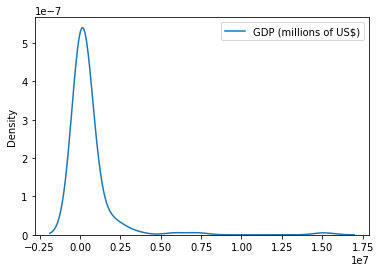

In [ ]:
sns.kdeplot(data=df)

In [ ]:
df = df['GDP (millions of US$)']
df

0       18181
1       12847
2      190709
3      100948
4      447644
        ...  
120     45353
121    315841
122    122722
123     33675
124     19206
Name: GDP (millions of US$), Length: 125, dtype: int64

In [ ]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'South America', 'Oceania',
       'North America'], dtype=object)

In [ ]:
df['GDP'] = df['GDP (millions of US$)']
df

,Country,Continent,GDP (millions of US$),GDP
0,Afghanistan,Asia,18181,18181
1,Albania,Europe,12847,12847
2,Algeria,Africa,190709,190709
3,Angola,Africa,100948,100948
4,Argentina,South America,447644,447644
...,...,...,...,...
120,Uzbekistan,Asia,45353,45353
121,Venezuela,South America,315841,315841
122,Vietnam,Asia,122722,122722
123,Yemen,Africa,33675,33675


In [ ]:
tg = df.loc[df.GDP >= 500000]
tg

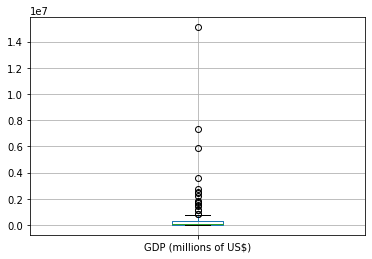

In [ ]:
df.boxplot()

# **Kiểm định giả thuyết**

# Trung bình GDP của các quốc gia trên thế giới là 500 tỉ usd/năm

H0 : mean(GDP) = 500 tỉ <br>
H1 : ≠ 500 tỉ

=> là kiểm định 2 phía

In [ ]:
t_statistic,p_value = scipy.stats.ttest_1samp(df,500000)
t_statistic,p_value

(0.3757438669518338, 0.7077493494055246)

Giả sử chọn mức ý nghĩa alpha = 5% = 0.05
 
ta thấy p_value > alpha nên loại H0 không thành công,  không đủ cơ sở chấp nhận  H1

=> Trung bình GDP của các quốc gia trên thế giới là 500 tỉ usd/năm là đúng

# GDP trung bình ở các quốc gia ở châu Âu cao hơn châu Á không

H0:1- 2<=0 ( GDP(châu á) -châu âu <0)

H1:1- 2>0 ( GDP( á) - âu >0 ) 

=> kiểm định phía phải

In [ ]:
df1 = df.loc[df['Continent']=='Asia']
df1

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
8,Bahrain,Asia,26108
9,Bangladesh,Asia,113032
16,Brunei,Asia,15533
18,Burma,Asia,51925
19,Cambodia,Asia,12861
23,China,Asia,7298147
49,Hong Kong,Asia,243302
52,India,Asia,1676143
53,Indonesia,Asia,845680


In [ ]:
df1 = df1['GDP']

In [ ]:
df2 = df.loc[df['Continent']=='Europe']
df2 = df2['GDP']
df2

In [ ]:
t_statistic1 , p_value1 = scipy.stats.ttest_ind(df1,df2,equal_var=False)
t_statistic1,p_value1

(0.5546583491057376, 0.5813877404597693)

do t_statistic1 >0 and p_value1 >2*alpha <br>
=> Bác bỏ  giả thiết H0 không thành công và không đủ cơ sở  chấp nhận giả thuyết H1 

# GDP trung bình của các quốc gia ở châu Âu và châu Mỹ là bằng nhau

H0 : 1-2=0
H1: 1-2 ≠ 0 

=> kiểm định 2 phía

chọn alpha = 5% = 0.05

In [ ]:
df3 = df.loc[(df['Continent'] == 'North America') ]#& (df['Continent'] == 'South America')]
df3

,Country,Continent,GDP (millions of US$)
21,Canada,North America,1736869
27,Costa Rica,North America,40947
33,Dominican Republic,North America,56700
36,El Salvador,North America,22761
47,Guatemala,North America,46897
48,Honduras,North America,17381
59,Jamaica,North America,14807
73,Mexico,North America,1154784
84,Panama,North America,30569
110,Trinidad and Tobago,North America,22707


In [ ]:
df4 = df.loc[(df['Continent'] == 'South America') ]
df4

,Country,Continent,GDP (millions of US$)
4,Argentina,South America,447644
15,Brazil,South America,2492908
22,Chile,South America,248411
24,Colombia,South America,328422
34,Ecuador,South America,66381
86,Paraguay,South America,21236
87,Peru,South America,173502
119,Uruguay,South America,46872
121,Venezuela,South America,315841


In [ ]:
df5 = pd.concat([df3,df4],axis=0)
df5

,Country,Continent,GDP (millions of US$)
21,Canada,North America,1736869
27,Costa Rica,North America,40947
33,Dominican Republic,North America,56700
36,El Salvador,North America,22761
47,Guatemala,North America,46897
48,Honduras,North America,17381
59,Jamaica,North America,14807
73,Mexico,North America,1154784
84,Panama,North America,30569
110,Trinidad and Tobago,North America,22707


In [ ]:
df5 = df5['GDP (millions of US$)']
df5

In [ ]:
t_statistic2 , p_value2 = scipy.stats.ttest_ind(df2,df5,equal_var=False)
t_statistic2,p_value2

(-0.7882914270473153, 0.4396139393183093)

# **[Bài tập] Kiểm định House Price Đống Đa Hà Nội**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy

In [ ]:
data = pd.read_csv('https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/01/08185827/house_price_Do%CC%82%CC%81ng-Da_Ha%CC%80-No%CC%A3%CC%82i_subdata.csv')
data.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [ ]:
data = data.loc[:,['price','land_certificate','property_type']]
data

,price,land_certificate,property_type
0,14700.0,So do,trong ngo
1,4200.0,So do,trong ngo
2,11000.0,So do,trong ngo
3,2900.0,So do,trong ngo
4,3950.0,So do,trong ngo
...,...,...,...
666,23500.0,NaN,mat pho
667,17500.0,So do,mat pho
668,17500.0,NaN,mat pho
669,24800.0,NaN,mat pho


In [ ]:
data['land_certificate'].unique()

array(['So do', nan], dtype=object)

In [ ]:
condition = (data.price.isna() | data.property_type.isna() )#| data.land_certificate.isna() )

In [ ]:
data = data[condition==False]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 670
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             617 non-null    float64
 1   land_certificate  359 non-null    object 
 2   property_type     617 non-null    object 
dtypes: float64(1), object(2)
memory usage: 19.3+ KB


In [ ]:
tg = data['price'].dropna()

# Vẽ biểu đồ so sánh phân phối giá (triệu đ/m2) giữa nhà Phố và Nhà ngõ

In [ ]:
data1 = data.loc[data['property_type']=='trong ngo']
data1

,price,land_certificate,property_type
0,14700.0,So do,trong ngo
1,4200.0,So do,trong ngo
2,11000.0,So do,trong ngo
3,2900.0,So do,trong ngo
4,3950.0,So do,trong ngo
...,...,...,...
444,32000.0,NaN,trong ngo
445,15800.0,So do,trong ngo
446,10200.0,So do,trong ngo
447,3900.0,So do,trong ngo


In [ ]:
data2 = data.loc[data['property_type']=='mat pho']
data2

,price,land_certificate,property_type
449,12500.0,So do,mat pho
450,36000.0,So do,mat pho
451,13500.0,So do,mat pho
452,13000.0,So do,mat pho
453,29000.0,So do,mat pho
...,...,...,...
666,23500.0,NaN,mat pho
667,17500.0,So do,mat pho
668,17500.0,NaN,mat pho
669,24800.0,NaN,mat pho


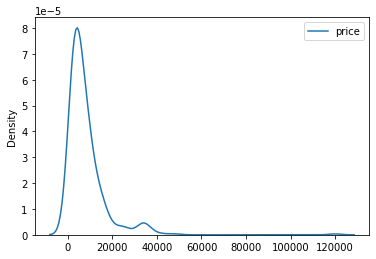

In [ ]:
sns.kdeplot(data=data1)

{'boxes': [<matplotlib.lines.Line2D at 0x7f9367a7cd50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9367a86e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9367a8de50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9367a8d910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9367a86390>,
  <matplotlib.lines.Line2D at 0x7f9367a868d0>]}

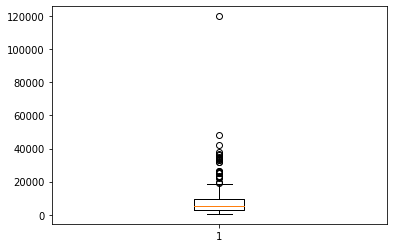

In [ ]:
plt.boxplot(data1['price'])

In [ ]:
data1 = data1.loc[data1['price'] <= 17000]
data1

,price,land_certificate,property_type
0,14700.0,So do,trong ngo
1,4200.0,So do,trong ngo
2,11000.0,So do,trong ngo
3,2900.0,So do,trong ngo
4,3950.0,So do,trong ngo
...,...,...,...
443,2850.0,NaN,trong ngo
445,15800.0,So do,trong ngo
446,10200.0,So do,trong ngo
447,3900.0,So do,trong ngo


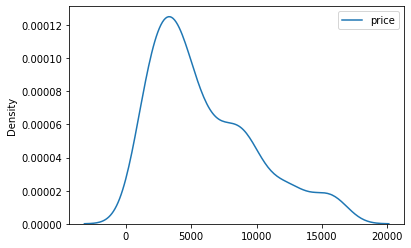

In [ ]:
sns.kdeplot(data=data1)

{'boxes': [<matplotlib.lines.Line2D at 0x7f9367683a90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9367688ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f936768eb10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f936768e5d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9367688050>,
  <matplotlib.lines.Line2D at 0x7f9367688590>]}

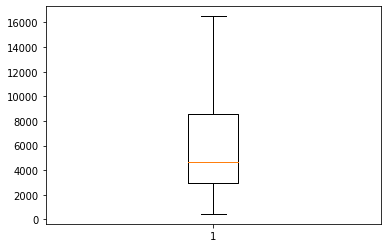

In [ ]:
plt.boxplot(data1['price'])

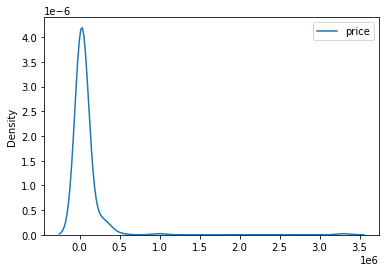

In [ ]:
sns.kdeplot(data=data2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f9367972410>],
 'caps': [<matplotlib.lines.Line2D at 0x7f93679ce5d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9367967250>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9367967950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f936797c6d0>,
  <matplotlib.lines.Line2D at 0x7f9367972050>]}

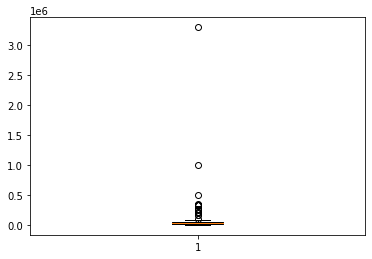

In [ ]:

plt.boxplot(data2['price'])

In [ ]:
data2 = data2.loc[data2['price'] <= 50000]
data2

,price,land_certificate,property_type
449,12500.0,So do,mat pho
450,36000.0,So do,mat pho
451,13500.0,So do,mat pho
452,13000.0,So do,mat pho
453,29000.0,So do,mat pho
...,...,...,...
666,23500.0,NaN,mat pho
667,17500.0,So do,mat pho
668,17500.0,NaN,mat pho
669,24800.0,NaN,mat pho


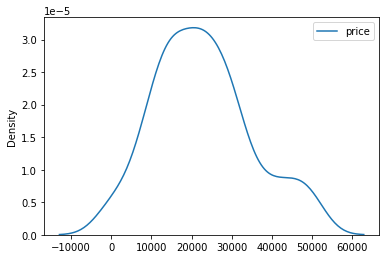

In [ ]:
sns.kdeplot(data=data2)

# Kiểm định giả thuyết giá (triệu đ/m2) nhà mặt phố cao hơn giá nhà trong ngõ với mức ý nghĩa 5%

H0:1- 2<=0 ( giá nhà phố <= giá nhà ngõ )

H1:1- 2>0 ( giá nhà phố > giá nhà ngõ )

=> kiểm định phía phải

In [ ]:
data1 = data1['price']
data1

In [ ]:
data2 = data2['price']
data2

In [ ]:
data2.isnull().any()

True

In [ ]:
t_statistic3 , p_value3 = scipy.stats.ttest_ind(data1[data1['property_type']=='trong ngo']['price'],data2[data2['property_type']=='mat pho']['price'],equal_var=False)
t_statistic3,p_value3

(-17.86139937643188, 1.4754565516482924e-42)

In [ ]:
2*0.05 > p_value3

True

do t_statistic < 0 , nên không đủ điều kiện bác bỏ H0, chính vì vậy cx ko đủ điều kiện chấp nhận H1

# Giá của những căn nhà không có thông tin về giấy tờ pháp lý thấp hơn giá nhà những căn có thông tin về giấy tờ pháp lý với mức ý nghĩa 5%

In [ ]:
t_statistic4 , p_value4 = scipy.stats.ttest_ind(data1[data1['land_certificate']=='So do']['price'],data2[data2['land_certificate']=='NaN']['price'])
t_statistic4,p_value4

(nan, nan)

# **[Bài tập] Kiểm định giả thuyết trên bộ dữ liệu credit scoring**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy

In [ ]:
df = pd.read_csv('https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/01/26023345/Credit_Scoring.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

# KIểm Định giả thuyết

## Có phải những khách hàng không có người phụ thuộc sẽ có thu nhập trung bình theo tháng (MonthlyIncome) nhỏ hơn những khách hàng có người phụ thuộc không (với mức ý nghĩa 10%)

In [ ]:
df1 = df[['MonthlyIncome','NumberOfDependents']]
df1

,MonthlyIncome,NumberOfDependents
0,NaN,NaN
1,23684.0,2.0
2,2500.0,0.0
3,6501.0,2.0
4,12454.0,2.0
...,...,...
149987,2100.0,0.0
149988,5584.0,2.0
149989,NaN,0.0
149990,5716.0,0.0


In [ ]:
condition = (  df1.MonthlyIncome.isna() | df1.NumberOfDependents.isna() )

In [ ]:
df1 = df1[condition==False]
df1

,MonthlyIncome,NumberOfDependents
1,23684.0,2.0
2,2500.0,0.0
3,6501.0,2.0
4,12454.0,2.0
5,13700.0,2.0
...,...,...
149986,3400.0,0.0
149987,2100.0,0.0
149988,5584.0,2.0
149990,5716.0,0.0


In [ ]:
t_statistic5 , p_value5 = scipy.stats.ttest_ind(df1[df1['NumberOfDependents']==1]['MonthlyIncome'],df1[df1['NumberOfDependents']==2]['MonthlyIncome'],equal_var=False)
t_statistic5,p_value5

(-2.8301438741843317, 0.004655369671468538)

## Có phải trung bình số lượng khoản vay (NumberOfOpenCreditLinesAndLoans) những khách hàng gặp khó khăn trong vòng 2 năm trở lại đây (SeriousDlqin2yrs =1) thì sẽ cao hơn những khách hàng không gặp khó khăn không với mức ý nghĩa 10%

In [ ]:
df2 = df[['NumberOfOpenCreditLinesAndLoans','SeriousDlqin2yrs']]
df2

,NumberOfOpenCreditLinesAndLoans,SeriousDlqin2yrs
0,2,0
1,9,0
2,5,0
3,7,0
4,13,0
...,...,...
149987,4,0
149988,4,0
149989,18,0
149990,4,0


In [ ]:
df2['SeriousDlqin2yrs'].unique()

array([0, 1])

In [ ]:
condition1 = (  df2.NumberOfOpenCreditLinesAndLoans.isna() | df2.SeriousDlqin2yrs.isna() )

In [ ]:
df2 = df2[condition1 == False]
df2

,NumberOfOpenCreditLinesAndLoans,SeriousDlqin2yrs
0,2,0
1,9,0
2,5,0
3,7,0
4,13,0
...,...,...
149987,4,0
149988,4,0
149989,18,0
149990,4,0


In [ ]:
t_statistic6 , p_value6 = scipy.stats.ttest_ind(df2[df2['SeriousDlqin2yrs']==1]['NumberOfOpenCreditLinesAndLoans'],df2[df2['SeriousDlqin2yrs']==0]['NumberOfOpenCreditLinesAndLoans'],equal_var=False)
t_statistic6,p_value6

(-10.53484996850356, 7.875696017574721e-26)